## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import training data

In [2]:
df_train = pd.read_csv(r"C:\Users\dell\Downloads\train (3).csv")
df_train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


## Exploring training data

In [3]:
df_train.shape

(136429, 14)

In [4]:
df_train.size

1910006

In [5]:
df_train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
#checking null values
df_train.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
#checking duplicate values
df_train.duplicated().sum()

0

## Training data preprocessing

In [9]:
#dropping unncessary columns
df_train.drop(["id", "Product ID"], axis = 1, inplace = True)
df_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [10]:
#shifting target column to the extreme right
Col_list = ["Type","Air temperature [K]",
            "Process temperature [K]",
            "Rotational speed [rpm]",
            "Torque [Nm]",
            "Tool wear [min]",
            "TWF",
           "HDF",
           "PWF",
           "OSF",
           "RNF",
           "Machine failure"]
df_train = df_train.reindex(columns = Col_list)
df_train.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0


In [11]:
#changing categorical into numerical dtype using replace() function
df_train['Type'].value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

In [12]:
df_train['Type'].replace('L',0, inplace = True)
df_train['Type'].replace('M',1, inplace = True)
df_train['Type'].replace('H',2, inplace = True)
df_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,0,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,0,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,1,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


## Importing testing data

In [13]:
df_test = pd.read_csv(r"C:\Users\dell\Downloads\test (3).csv")
df_test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


## Exploring testing data

In [14]:
df_test.shape

(90954, 13)

In [15]:
df_test.size

1182402

In [16]:
df_test.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,181905.500000,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,26256.302529,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,136429.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,159167.250000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,181905.500000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,204643.750000,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [18]:
#checking null values
df_test.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [19]:
#checking duplicate values
df_test.duplicated().sum()

0

## Testing data preprocessing

In [20]:
#dropping unnecessary columns
df_test.drop(["id", "Product ID"], axis = 1, inplace = True)
df_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [21]:
#changing categorical into numerical dtype using replace() function
df_test['Type'].replace('L',0, inplace = True)
df_test['Type'].replace('M',1, inplace = True)
df_test['Type'].replace('H',2, inplace = True)
df_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,0,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,0,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,1,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,1,303.4,312.3,1515,41.3,114,0,0,0,0,0


## Importing target variable for testing

In [22]:
target = pd.read_csv(r"C:\Users\dell\Downloads\sample_submission (3).csv")
target.head()

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5


## Data vizualization

<AxesSubplot:xlabel='Machine failure', ylabel='count'>

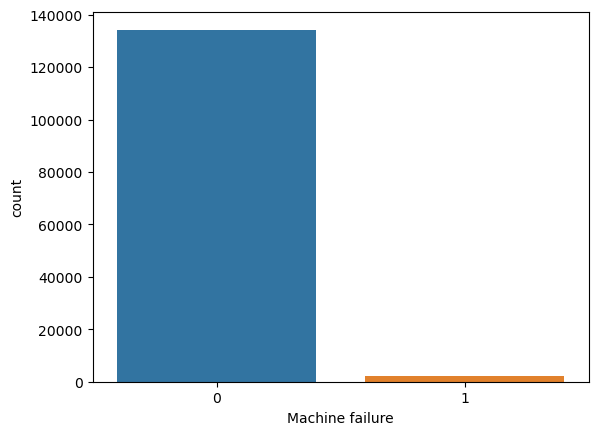

In [23]:
sns.countplot(df_train["Machine failure"])

### This is an imbalanced data.

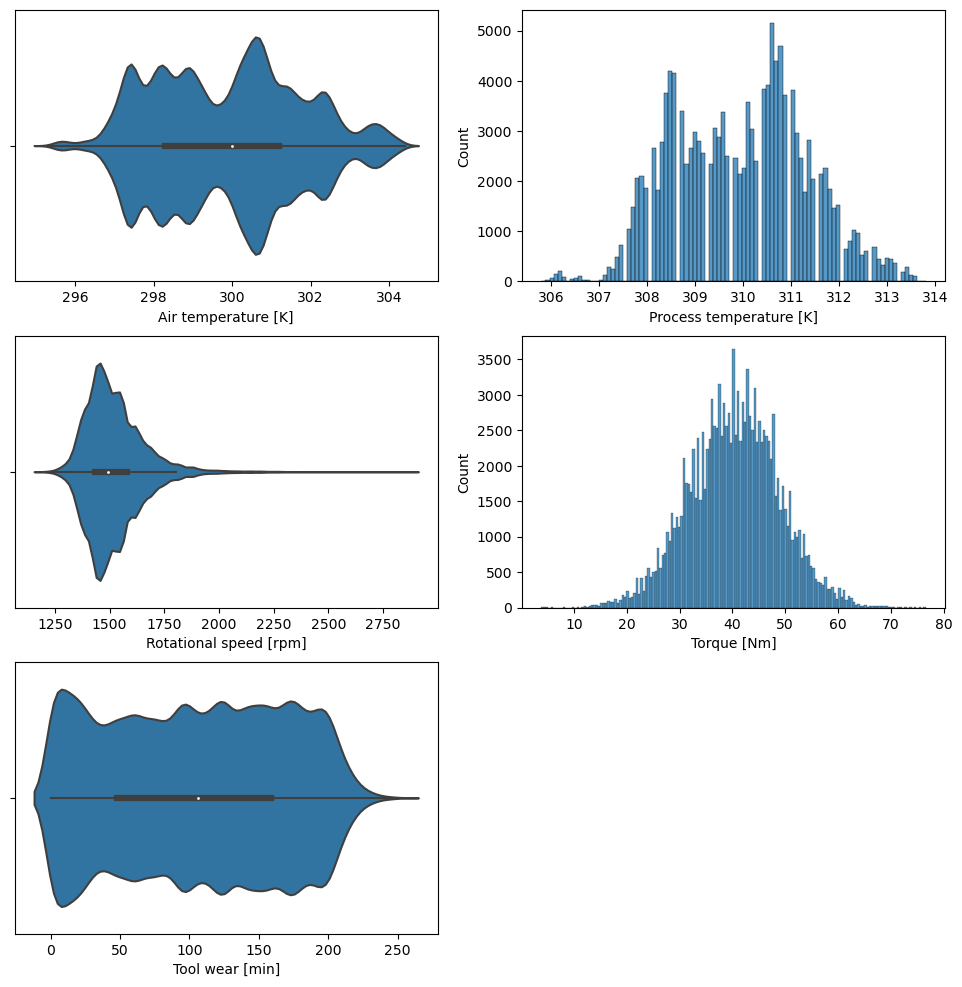

In [29]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
sns.violinplot(df_train['Air temperature [K]'])

plt.subplot(3,2,2)
sns.histplot(df_train['Process temperature [K]'])

plt.subplot(3,2,3)
sns.violinplot(df_train['Rotational speed [rpm]'])

plt.subplot(3,2,4)
sns.histplot(df_train['Torque [Nm]'])

plt.subplot(3,2,5)
sns.violinplot(df_train['Tool wear [min]'])

plt.show()

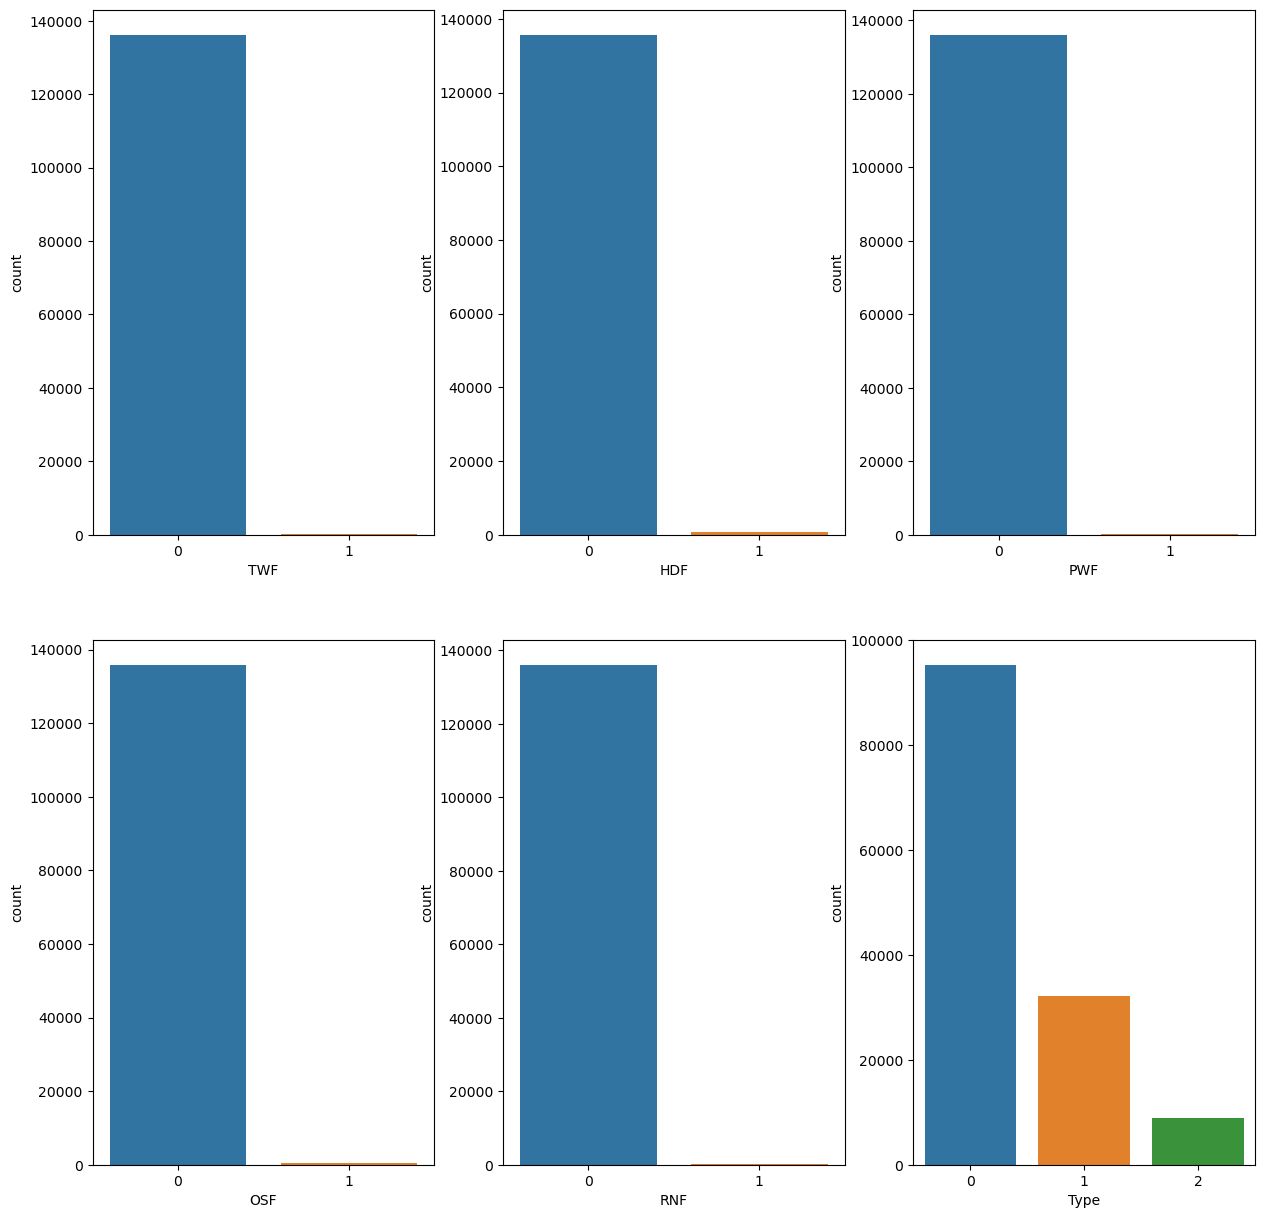

In [32]:
plt.figure(figsize=(15,15))

plt.subplot(2,3,1)
sns.countplot(df_train['TWF'])

plt.subplot(2,3,2)
sns.countplot(df_train['HDF'])

plt.subplot(2,3,3)
sns.countplot(df_train['PWF'])

plt.subplot(2,3,4)
sns.countplot(df_train['OSF'])

plt.subplot(2,3,5)
sns.countplot(df_train['RNF'])

plt.subplot(2,3,6)
sns.countplot(df_train['Type'])

plt.show()

<AxesSubplot:>

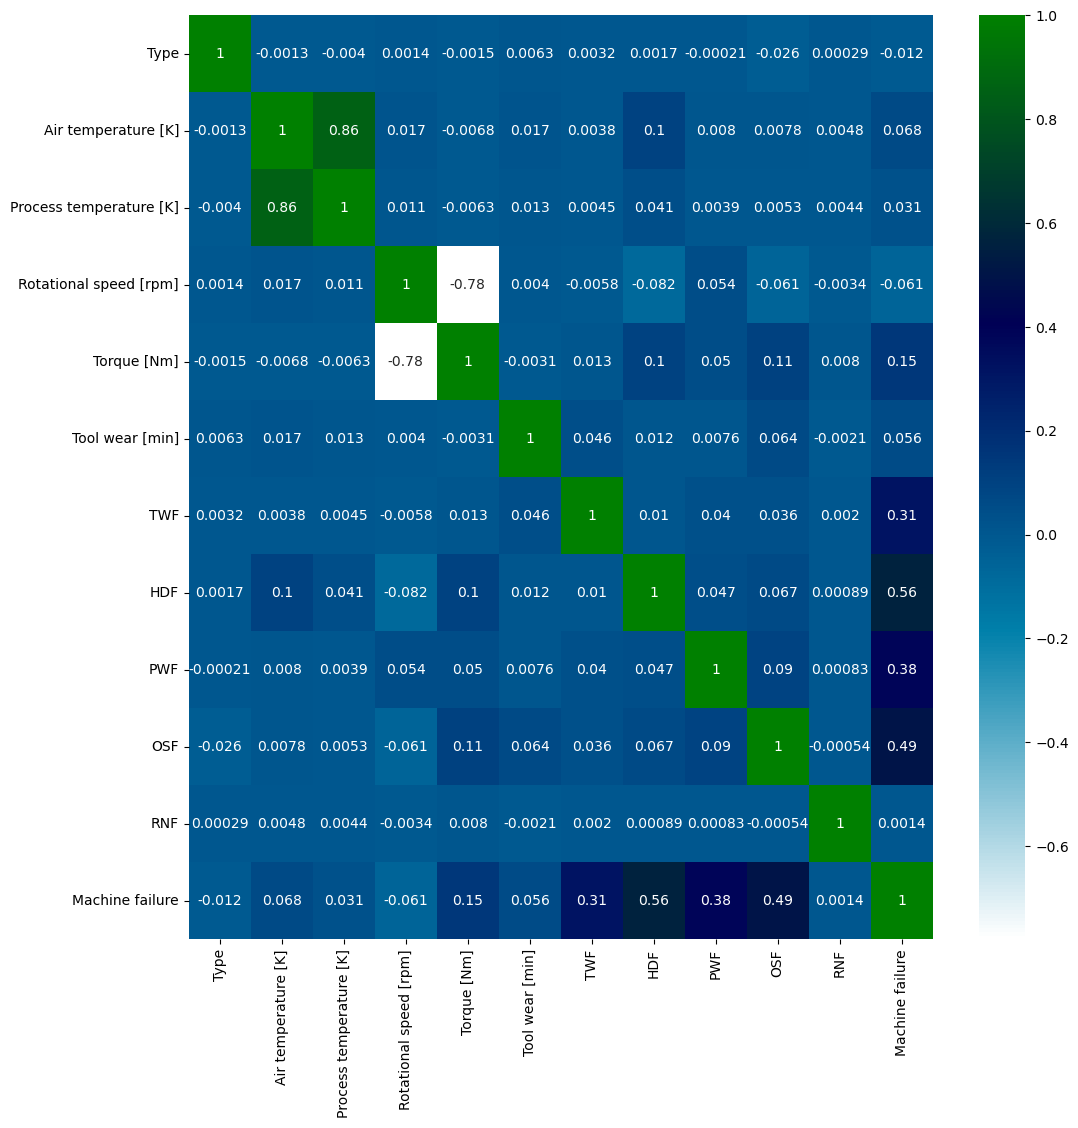

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(), annot=True, cmap = "ocean_r")

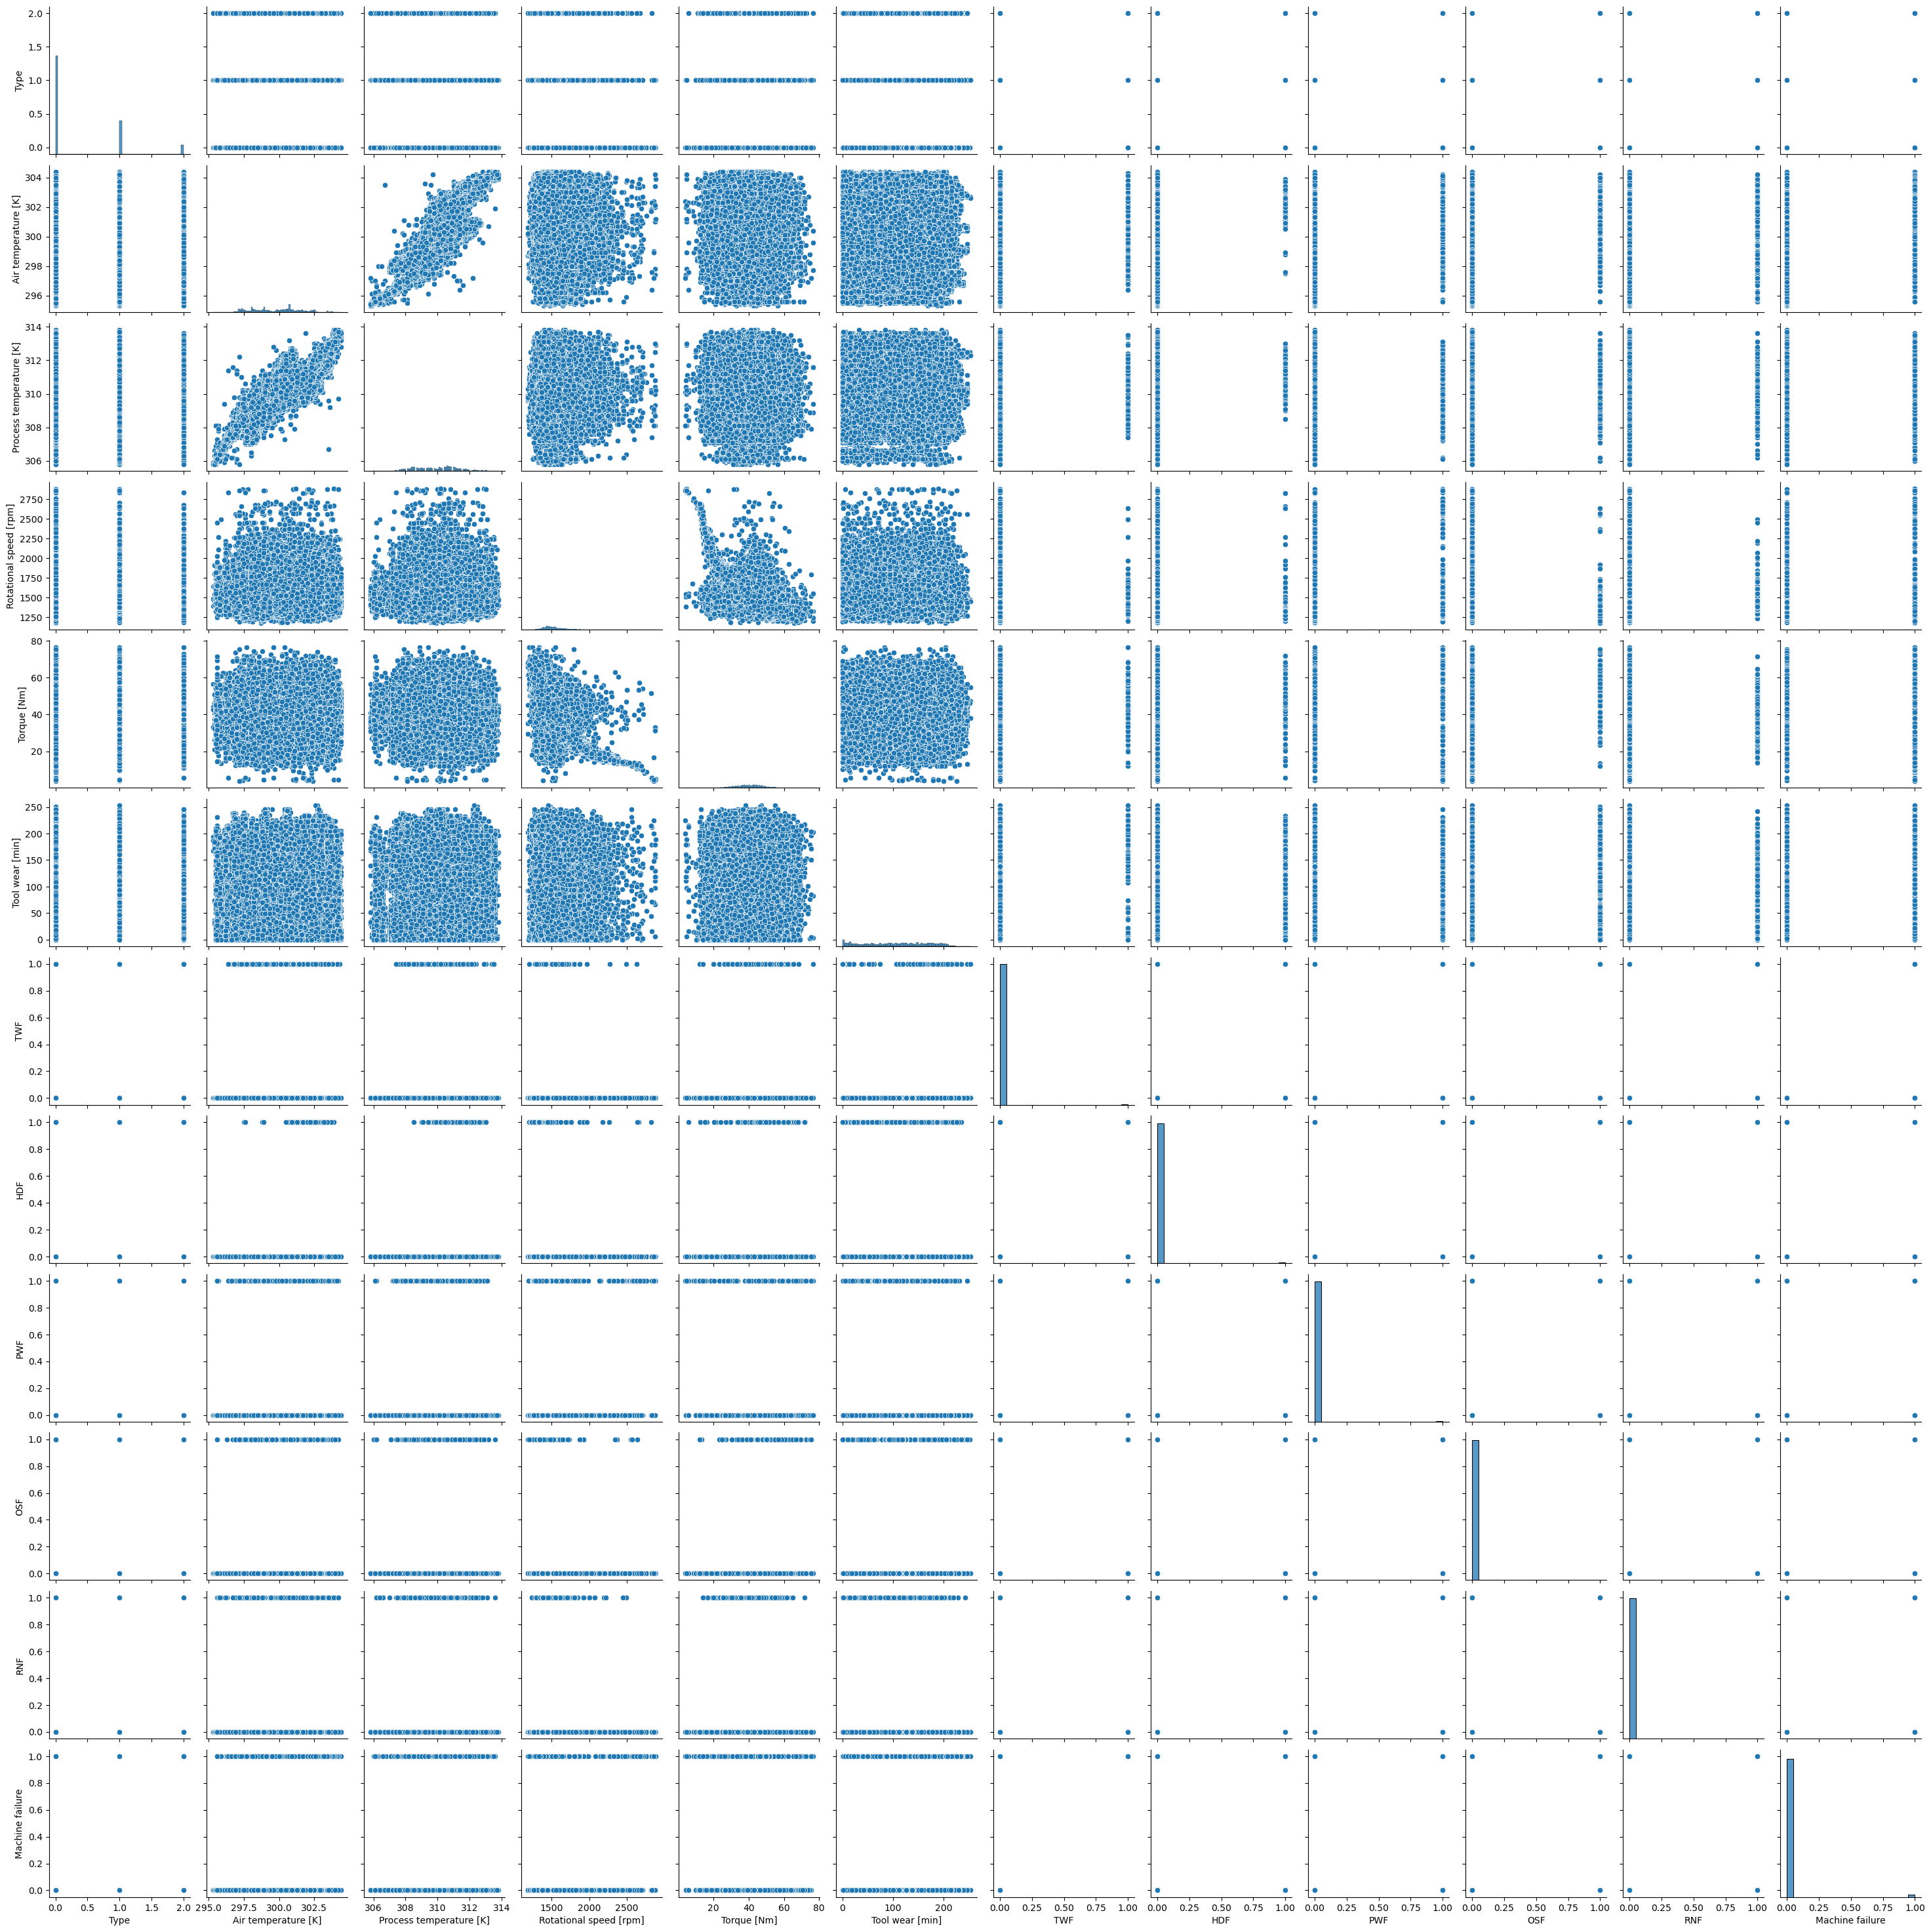

In [33]:
sns.pairplot(df_train)

## Model building

In [35]:
#defining variables
xtrain = df_train.iloc[:,:-1]
ytrain = df_train["Machine failure"]
xtest = df_test
ytest = target["Machine failure"]

### 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(xtrain, ytrain)

LogisticRegression()

In [37]:
#prediction
ypredtest = log_model.predict(xtest)

In [38]:
#finding probability
ypredprob = log_model.predict_proba(xtest)
ypredprob

array([[0.99719919, 0.00280081],
       [0.99828776, 0.00171224],
       [0.99601996, 0.00398004],
       ...,
       [0.99199259, 0.00800741],
       [0.99550426, 0.00449574],
       [0.99709919, 0.00290081]])

In [39]:
#Saving predictions in sample submission file
probabilities = pd.DataFrame(ypredprob[:,1])
file4 = probabilities.to_csv("Final Submission using Logistic Regression 15-6-23.csv", index = False)

file4 = pd.read_csv("Final Submission using Logistic Regression 15-6-23.csv")
file4 = pd.concat([target['id'],probabilities], axis = 1)
file4.columns = ["id", "Machine failure"]
file4.to_csv("Final Submission using Logistic Regression 15-6-23.csv", index = False)

### 2. Random Forest Algorithm

In [40]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
#Number of features to consider at every split
max_features = ["auto", "sqrt"]
#Maximum number of levels in tree
max_depth = [2,4]
#Minimum number of samples required to split a node
min_samples_split = [2,5]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
#Method of selecting samples for training each tree
bootstrap = [True, False]

In [41]:
#Creating a pipeline
param_grid = {"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf,
             "bootstrap":bootstrap}

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

#using GridSearchCV
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)
rf_Grid.fit(xtrain, ytrain)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [43]:
print(rf_Grid.best_params_)
print(rf_Grid.best_score_)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 72}
0.9961811637209427


In [44]:
#fitting training data in random forest classifier with best parameters
rf_Model = RandomForestClassifier(bootstrap= True,
                                  max_depth= 4,
                                  max_features= 'auto',
                                  min_samples_leaf= 2,
                                  min_samples_split= 5,
                                  n_estimators= 72)
rf_Model.fit(xtrain, ytrain)

#prediction
ypred = rf_Model.predict(xtest)

In [45]:
#finding probabilities
ypredprob1 = rf_Model.predict_proba(xtest)
ypredprob1

array([[0.99223132, 0.00776868],
       [0.99453437, 0.00546563],
       [0.99455607, 0.00544393],
       ...,
       [0.99476784, 0.00523216],
       [0.99476784, 0.00523216],
       [0.99223132, 0.00776868]])

In [46]:
#Saving predictions in sample submission file
probabilities1 = pd.DataFrame(ypredprob1[:,1])
file5 = probabilities1.to_csv("Final Submission using Random Forest 15-6-23.csv", index = False)

file5 = pd.read_csv("Final Submission using Random Forest 15-6-23.csv")
file5 = pd.concat([target['id'],probabilities1], axis = 1)
file5.columns = ["id", "Machine failure"]
file5.to_csv("Final Submission using Random Forest 15-6-23.csv", index = False)

## References

https://www.kaggle.com/competitions/playground-series-s3e17/data